In [2]:
from qutip import *
import numpy as np
import os
import matplotlib.pyplot as plt
from math import factorial
from scipy.optimize import fsolve

In [4]:
import sys

sys.path.append("python_scripts")

from hamiltonian_util import *
from spatial_util import *
from wigner_util import *

In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
BIGGEST_SIZE = 25

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Perfectly Timed

In [6]:
N = 10
epsilon_x = 3e3
epsilon_y = 3e3
delta_z = 0
rabi_x_x = 10e3
rabi_y_y = 10e3
sqrt_gamma_x = np.sqrt(0)
sqrt_gamma_y = np.sqrt(0)
sqrt_gamma_phase = np.sqrt(0)
num_steps = 16
exp_time = 1/epsilon_x
granularity = 2
tau = 5e-3

In [7]:
# Motional operators
a = destroy(N)
iden_N = identity(N)

# Hamiltonians
HO_X, HO_Y, JT_X, JT_Y, H_Z = get_default_hamiltonian_one_ion(N, epsilon_x, epsilon_y, rabi_x_x, rabi_y_y, delta_z)
JT_Y_X_Position, JT_X_Y_Position, JT_Y_X_Momentum, JT_X_Y_Momentum = get_cross_terms_one_ion(N, rabi_x_x, rabi_y_y)

JT = rabi_x_x*np.pi*(tensor((a + a.dag())**2, identity(N), identity(2)) + tensor(identity(N), (a + a.dag())**2, identity(2))).sqrtm()

In [8]:
# Jump Operators
jump_operators = get_jump_operators_one_ion(N, sqrt_gamma_x, sqrt_gamma_y, sqrt_gamma_phase)

### No CI

In [9]:
# Input, including full Hamiltonian and times to evolve
plus = ((np.sqrt(0.5))*basis(2, 0) + (np.sqrt(0.5))*basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())
H_0 = HO_X + HO_Y + H_Z

H_1 = [H_0, [-1*JT, f't/{2*tau}']]
t_1 = np.linspace(0, tau, 100)

H_2 = [H_0, [-1*JT, f't/{2*tau}']]
t_2 = np.linspace(tau, 2*tau, 100)

Hamiltonians = [H_1, H_2]
times = [t_1, t_2]

t_total = np.linspace(0, 2*tau, 200)

In [10]:
# Perform eovlutio
states = evolution_by_steps(times, Hamiltonians, psi0, jump_operators)

0
1


In [11]:
xvec = np.linspace(-3, 3, 100)
no_ci = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


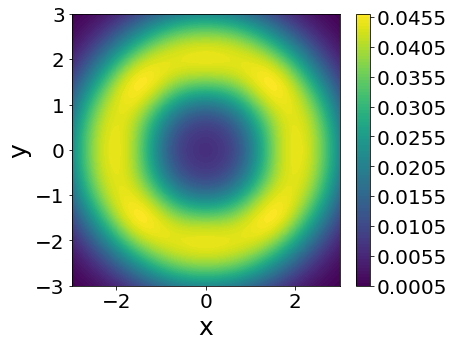

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
cc = axes.contourf(xvec, xvec, no_ci/(np.sum(no_ci)*(6/100)**2), 100)
axes.set_xlabel('x')
axes.set_ylabel('y')
fig.colorbar(cc, ax=axes)

for c in cc.collections:
    c.set_edgecolor("face")

fig.savefig("figures/appendix_no_ci.pdf", bbox_inches='tight')

plt.show()

### Start with CI, turn off midway

In [29]:
# Input, including full Hamiltonian and times to evolve
plus = ((np.sqrt(0.5))*basis(2, 0) + (np.sqrt(0.5))*basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())
H_0 = HO_X + HO_Y + H_Z

H_1 = [H_0, [JT_X, f't/{2*tau}'], [JT_Y, f't/{2*tau}']]
t_1 = np.linspace(0, tau, 100)

H_2 = [H_0, [-1*JT, f't/{2*tau}']]
t_2 = np.linspace(tau, 2*tau, 100)

Hamiltonians = [H_1, H_2]
times = [t_1, t_2]

t_total = np.linspace(0, 2*tau, 200)

In [30]:
# Perform eovlutio
states = evolution_by_steps(times, Hamiltonians, psi0, jump_operators)

0
1


In [31]:
xvec = np.linspace(-3, 3, 100)
half_way = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


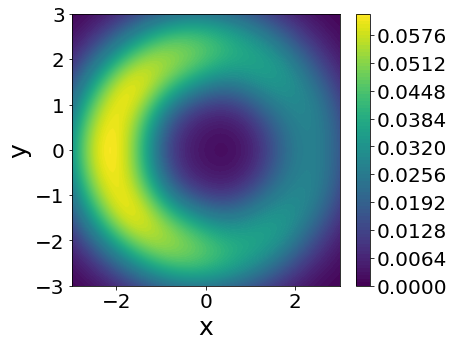

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
cc = axes.contourf(xvec, xvec, half_way/(np.sum(half_way)*(6/100)**2), 100)
axes.set_xlabel('x')
axes.set_ylabel('y')
fig.colorbar(cc, ax=axes)

for c in cc.collections:
    c.set_edgecolor("face")

fig.savefig("figures/appendix_ci_halfway.pdf", bbox_inches='tight')

plt.show()

### Pure CI

In [22]:
# Input, including full Hamiltonian and times to evolve
plus = ((np.sqrt(0.5))*basis(2, 0) + (np.sqrt(0.5))*basis(2, 1))
psi0 = tensor(tensor(thermal_dm(N, 0), thermal_dm(N, 0)), plus*plus.dag())
H_0 = HO_X + HO_Y + H_Z

H_1 = [H_0, [JT_X, f't/{2*tau}'], [JT_Y, f't/{2*tau}']]
t_1 = np.linspace(0, tau, 100)

H_2 = [H_0, [JT_X, f't/{2*tau}'], [JT_Y, f't/{2*tau}']]
t_2 = np.linspace(tau, 2*tau, 100)

Hamiltonians = [H_1, H_2]
times = [t_1, t_2]

t_total = np.linspace(0, 2*tau, 200)

In [23]:
# Perform eovlutio
states = evolution_by_steps(times, Hamiltonians, psi0, jump_operators)

0
1


In [24]:
xvec = np.linspace(-3, 3, 100)
ci = get_2d_spatial_distribution(states[-1].ptrace([0,1]), N, xvec)

C:\Users\12482\miniconda3\lib\site-packages\numpy\ma\core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


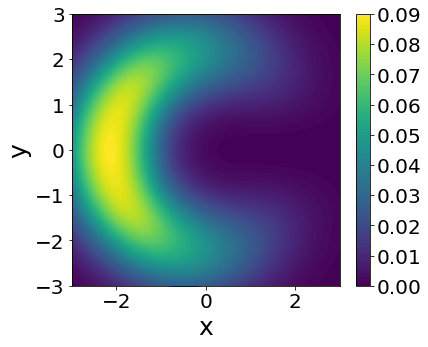

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
cc = axes.contourf(xvec, xvec, ci/(np.sum(ci)*(6/100)**2), 100)
axes.set_xlabel('x')
axes.set_ylabel('y')
fig.colorbar(cc, ax=axes)

for c in cc.collections:
    c.set_edgecolor("face")

fig.savefig("figures/appendix_ci.pdf", bbox_inches='tight')

plt.show()